In [26]:
# import packages - \src\utils\start_wrapper.py
from src.utils.start_wrapper import *
wrapper_notebook_settings()

# Load dictionary of project paths
import src.utils.paths
paths = src.utils.paths.paths_dictionary()
print("Contents of paths dictionary:")
for key in paths:
    print(key, ": ", paths[key])


#  basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# Load environment variables
import dotenv
import os
dotenv.load_dotenv(os.path.join(os.path.dirname(os.getcwd()), '.env'))

# project specific packages
import urllib.request
import seaborn as sns
import sklearn as sk
from sklearn import metrics
from prophet import Prophet

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Contents of paths dictionary:
data :  /app/data/
docs :  /app/docs/
models :  /app/models/
notebooks :  /app/notebooks/
references :  /app/references/
reports :  /app/reports/
src :  /app/src/
app :  /app/
data_external :  /app/data/external/
data_interim :  /app/data/interim/
data_processed :  /app/data/processed/
data_raw :  /app/data/raw/
reports_figures :  /app/reports/figures/
src_data :  /app/src/data/
src_features :  /app/src/features/
src_models :  /app/src/models/
src_utils :  /app/src/utils/
src_visualization :  /app/src/visualization/


In [2]:
# Kids, don't do this at home
os.environ['secret_apiKey']

'S0_S3cR3T'

In [3]:
def stooqData(ticker: str):
    url = f"https://stooq.com/q/d/l/?s={ticker}&i=d"
    data = pd.read_csv(url)
    data.columns = [col.lower() for col in data.columns]
    data['date'] = pd.to_datetime(data['date'])
    return data

# if you're reading this carved out in stone in front of a cave, I am sorry. You have to be connected to the Internet to download data from the web.

In [4]:
aapl = stooqData('aapl.us')
aapl

,date,open,high,low,close,volume
0,1984-09-07,0.100763,0.101999,0.099546,0.100763,9.767604e+07
1,1984-09-10,0.100763,0.101071,0.098340,0.100165,7.581254e+07
2,1984-09-11,0.101071,0.103814,0.101071,0.101999,1.787705e+08
3,1984-09-12,0.101999,0.102597,0.098928,0.098928,1.561713e+08
4,1984-09-13,0.104432,0.104730,0.104432,0.104432,2.432310e+08
...,...,...,...,...,...,...
9940,2024-02-16,183.420000,184.850000,181.665000,182.310000,4.975246e+07
9941,2024-02-20,181.790000,182.430000,180.000000,181.560000,5.366555e+07
9942,2024-02-21,181.940000,182.888800,180.660000,182.320000,4.152967e+07
9943,2024-02-22,183.480000,184.955000,182.460000,184.370000,5.229221e+07


In [5]:
aapl[(aapl["date"].dt.year == 2005) & (aapl["date"].dt.month == 2)]

,date,open,high,low,close,volume
5147,2005-02-01,1.17272,1.18379,1.16565,1.18040,7.963372e+08
5148,2005-02-02,1.18728,1.21619,1.18249,1.21190,1.201629e+09
5149,2005-02-03,1.20612,1.20931,1.17701,1.18458,8.594766e+08
5150,2005-02-04,1.18728,1.20154,1.18040,1.20004,6.611406e+08
5151,2005-02-07,1.20254,1.20772,1.17960,1.20154,6.159255e+08
5152,2005-02-08,1.20522,1.23873,1.19944,1.23135,1.044301e+09
5153,2005-02-09,1.23593,1.24799,1.18888,1.19844,1.400187e+09
5154,2005-02-10,1.19874,1.20672,1.16684,1.19276,1.282334e+09
5155,2005-02-11,1.21709,1.24451,1.20154,1.23593,1.409609e+09
5156,2005-02-14,1.25946,1.29086,1.24889,1.28817,1.492042e+09


In [6]:
train = aapl[['date', 'close']][:-7].copy()  # All data except the last 7 observations
train.columns = ['ds', 'y']  # Renaming columns to fit Prophet's requirements
display('train dataset size:', train.shape)
test = aapl[['date', 'close']][-7:].copy()   # Last 7 observations
test.columns = ['ds', 'y']  # Renaming columns to fit Prophet's requirements
display('train dataset size:', test.shape)

'train dataset size:'

(9938, 2)

'train dataset size:'

(7, 2)

In [7]:
train.tail()

,ds,y
9933,2024-02-07,189.41
9934,2024-02-08,188.32
9935,2024-02-09,188.85
9936,2024-02-12,187.15
9937,2024-02-13,185.04


In [8]:
test

,ds,y
9938,2024-02-14,184.15
9939,2024-02-15,183.86
9940,2024-02-16,182.31
9941,2024-02-20,181.56
9942,2024-02-21,182.32
9943,2024-02-22,184.37
9944,2024-02-23,182.52


In [9]:
# Python
m = Prophet()
m.fit(train)



07:50:09 - cmdstanpy - INFO - Chain [1] start processing
07:50:14 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
# Python
future = m.make_future_dataframe(periods=11)
future = future[future['ds'].dt.dayofweek < 5] # exclude weekends
future.tail(10)

,ds
9936,2024-02-12
9937,2024-02-13
9938,2024-02-14
9939,2024-02-15
9940,2024-02-16
9943,2024-02-19
9944,2024-02-20
9945,2024-02-21
9946,2024-02-22
9947,2024-02-23


In [11]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
9941,2024-02-19,184.518557,173.988844,194.993809
9942,2024-02-20,184.546733,173.696592,195.186141
9943,2024-02-21,184.578870,173.082581,194.317891
9944,2024-02-22,184.541210,173.999334,194.889830
9945,2024-02-23,184.462233,174.164035,194.880706


In [12]:
def identify_primary_key(df):
    for col in df.columns:
        if df[col].is_unique:
            print(f"The primary key for the DataFrame is: {col}")
            return col
    print("No primary key found.")
    return None

identify_primary_key(forecast)

The primary key for the DataFrame is: ds


'ds'

In [13]:
def get_column_types(df):
    types = df.dtypes
    print("Data Types for Each Column:")
    print(types)

get_column_types(aapl)
get_column_types(forecast)

Data Types for Each Column:
date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume           float64
dtype: object
Data Types for Each Column:
ds                            datetime64[ns]
trend                                float64
yhat_lower                           float64
yhat_upper                           float64
trend_lower                          float64
trend_upper                          float64
additive_terms                       float64
additive_terms_lower                 float64
additive_terms_upper                 float64
weekly                               float64
weekly_lower                         float64
weekly_upper                         float64
yearly                               float64
yearly_lower                         float64
yearly_upper                         float64
multiplicative_terms                 float64
multiplicative_terms_lower           float64
multiplicative_

In [14]:
test

,ds,y
9938,2024-02-14,184.15
9939,2024-02-15,183.86
9940,2024-02-16,182.31
9941,2024-02-20,181.56
9942,2024-02-21,182.32
9943,2024-02-22,184.37
9944,2024-02-23,182.52


In [15]:
test_forecast = test.merge(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds', how='left')
test_forecast.tail(20)

,ds,y,yhat,yhat_lower,yhat_upper
0,2024-02-14,184.15,184.499552,174.313969,194.812175
1,2024-02-15,183.86,184.484133,174.040173,194.237743
2,2024-02-16,182.31,184.423055,174.842343,195.743292
3,2024-02-20,181.56,184.546733,173.696592,195.186141
4,2024-02-21,182.32,184.578870,173.082581,194.317891
5,2024-02-22,184.37,184.541210,173.999334,194.889830
6,2024-02-23,182.52,184.462233,174.164035,194.880706


In [16]:
print(type(train))
print(type(test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [17]:
full_sample = pd.concat([train, test_forecast], ignore_index=True, sort=False)

In [18]:
full_sample.tail(10)

,ds,y,yhat,yhat_lower,yhat_upper
9935,2024-02-09,188.85,NaN,NaN,NaN
9936,2024-02-12,187.15,NaN,NaN,NaN
9937,2024-02-13,185.04,NaN,NaN,NaN
9938,2024-02-14,184.15,184.499552,174.313969,194.812175
9939,2024-02-15,183.86,184.484133,174.040173,194.237743
9940,2024-02-16,182.31,184.423055,174.842343,195.743292
9941,2024-02-20,181.56,184.546733,173.696592,195.186141
9942,2024-02-21,182.32,184.578870,173.082581,194.317891
9943,2024-02-22,184.37,184.541210,173.999334,194.889830
9944,2024-02-23,182.52,184.462233,174.164035,194.880706


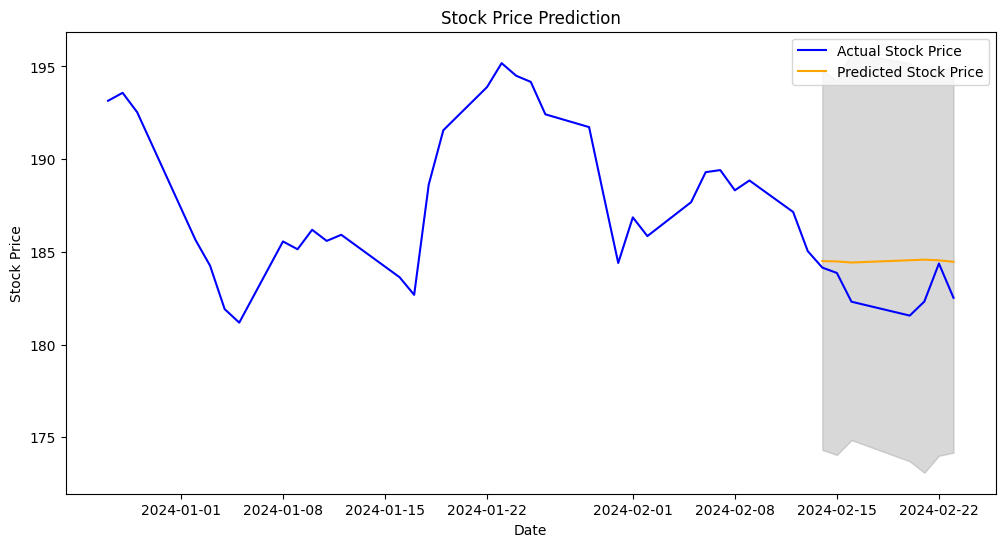

In [19]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(full_sample['ds'][-40:], full_sample['y'][-40:], label='Actual Stock Price', color='blue')
plt.plot(full_sample['ds'][-40:], full_sample['yhat'][-40:], label='Predicted Stock Price', color='orange')

# Shading the area for prediction intervals
# Assuming the last 7 observations have the forecast data
plt.fill_between(full_sample['ds'][-7:], full_sample['yhat_lower'][-7:], full_sample['yhat_upper'][-7:], color='gray', alpha=0.3)

# Adding labels, title and legend
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()

# Show the plot
plt.show()

In [33]:
full_sample.to_csv(paths['data_processed']+'forecast_full_sample.csv', index=False) 

In [ ]:
# image of a poor prophet
# bad prophet, bad

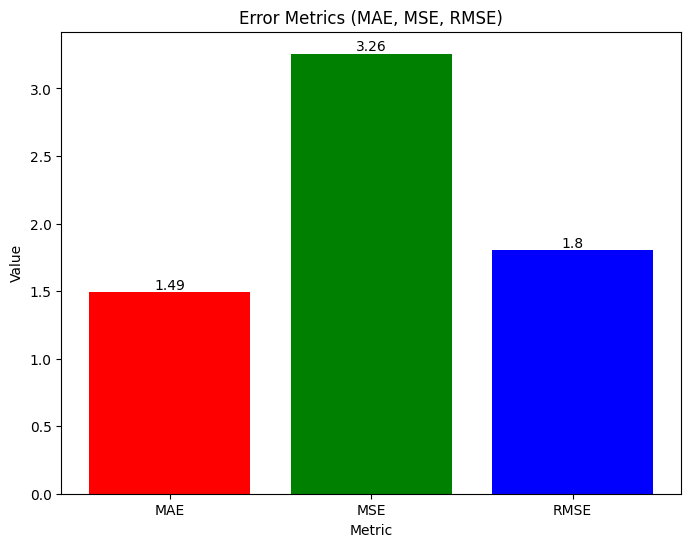

In [30]:
# Assuming 'full_sample' is your DataFrame with the actual and predicted values
# And you're focusing on the last 40 observations
actual = full_sample[full_sample['yhat'].notnull()]['y']
predicted = full_sample[full_sample['yhat'].notnull()]['yhat']

# Calculate MAE, MSE, and RMSE
mae = sk.metrics.mean_absolute_error(actual, predicted)
mse = sk.metrics.mean_squared_error(actual, predicted)
rmse = np.sqrt(mse) # RMSE is the square root of MSE

# Metrics and their names
metrics = [mae, mse, rmse]
metric_names = ['MAE', 'MSE', 'RMSE']

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(metric_names, metrics, color=['red', 'green', 'blue'])

# Adding the value on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Error Metrics (MAE, MSE, RMSE)')

# Saving the plot
plt.savefig(paths['reports_figures']+'error_metrics.png')
# Show the plot
plt.show()



In [28]:
paths['models']

'/app/models/'

In [27]:
# Python serializing
# For prophet there can be problems with pickling -> hence we use serialization
from prophet.serialize import model_to_json, model_from_json

with open(paths['models']+'m001_tg_appl.json', 'w') as fout:
    fout.write(model_to_json(m))  # Save model

#  with open('serialized_model.json', 'r') as fin:
#     m = model_from_json(fin.read())  # Load model